# Multiple Instances of an FMU
Tutorial by Johannes Stoljar, Tobias Thummerer

## License
Copyright (c) 2021 Tobias Thummerer, Lars Mikelsons, Josef Kircher, Johannes Stoljar

Licensed under the MIT license. See [LICENSE](https://github.com/thummeto/FMI.jl/blob/main/LICENSE) file in the project root for details.

## Motivation
This Julia Package *FMI.jl* is motivated by the use of simulation models in Julia. Here the FMI specification is implemented. FMI (*Functional Mock-up Interface*) is a free standard ([fmi-standard.org](http://fmi-standard.org/)) that defines a container and an interface to exchange dynamic models using a combination of XML files, binaries and C code zipped into a single file. The user can thus use simulation models in the form of an FMU (*Functional Mock-up Units*). Besides loading the FMU, the user can also set values for parameters and states and simulate the FMU both as co-simulation and model exchange simulation.

## Introduction to the example
In this example we want to show that it is possible to create different instances of an FMU. The different instances can then be used to run independent simulations. After the FMU has been simulated, the simulation results are displayed in a graph. The used model is a one-dimensional spring pendulum without friction. The object-orientated structure of the *SpringPendulum1D* can be seen in the following graphic.

![svg](https://github.com/thummeto/FMI.jl/blob/main/docs/src/examples/pics/SpringPendulum1D.svg?raw=true)  


## Target group
The example is primarily intended for users who work in the field of simulations. The example wants to show how simple it is to use FMUs in Julia.


## Other formats
Besides, this [Jupyter Notebook](https://github.com/thummeto/FMI.jl/blob/examples/examples/multiple_instances.ipynb) there is also a [Julia file](https://github.com/thummeto/FMI.jl/blob/examples/examples/multiple_instances.jl) with the same name, which contains only the code cells and for the documentation there is a [Markdown file](https://github.com/thummeto/FMI.jl/blob/examples/examples/multiple_instances.md) corresponding to the notebook.  


## Getting started

### Installation prerequisites
|     | Description                       | Command                   | Alternative                                    |   
|:----|:----------------------------------|:--------------------------|:-----------------------------------------------|
| 1.  | Enter Package Manager via         | ]                         |                                                |
| 2.  | Install FMI via                   | add FMI                   | add " https://github.com/ThummeTo/FMI.jl "     |
| 3.  | Install FMIZoo via                | add FMIZoo                | add " https://github.com/ThummeTo/FMIZoo.jl "  |
| 4.  | Install Plots via                 | add Plots                 |                                                |

## Code section

To run the example, the previously installed packages must be included. 

In [1]:
# imports
using FMI
using FMIZoo
using Plots

### Simulation setup

Next, the start time and end time of the simulation are set. Finally, the recorded values are specified to store the results of the simulation.

In [2]:
tStart = 0.0
tStop = 8.0

vrs = ["mass.s"]

1-element Vector{String}:
 "mass.s"

### Import FMU

In the next lines of code the FMU model from *FMIZoo.jl* is loaded and the information about the FMU is shown.

In [3]:
# we use an FMU from the FMIZoo.jl
pathToFMU = get_model_filename("SpringPendulum1D", "Dymola", "2022x")

myFMU = fmiLoad(pathToFMU)
fmiInfo(myFMU)

┌ Info: fmi2Unzip(...): Successfully unzipped 153 files at `/tmp/fmijl_Dm0x8Y/SpringPendulum1D`.
└ @ FMIImport /home/runner/.julia/packages/FMIImport/oQYco/src/FMI2_ext.jl:76
┌ Info: fmi2Load(...): FMU resources location is `file:////tmp/fmijl_Dm0x8Y/SpringPendulum1D/resources`
└ @ FMIImport /home/runner/.julia/packages/FMIImport/oQYco/src/FMI2_ext.jl:192
┌ Info: fmi2Load(...): FMU supports both CS and ME, using CS as default if nothing specified.
└ @ FMIImport /home/runner/.julia/packages/FMIImport/oQYco/src/FMI2_ext.jl:195


#################### Begin information for FMU ####################
	Model name:			SpringPendulum1D
	FMI-Version:			2.0
	GUID:				{fc15d8c4-758b-48e6-b00e-5bf47b8b14e5}
	Generation tool:		Dymola Version 2022x (64-bit), 2021-10-08
	Generation time:		2022-05-19T06:54:23Z
	Var. naming conv.:		structured
	Event indicators:		0
	Inputs:				0
	Outputs:			0
	States:				2
		33554432 ["mass.s"]
		33554433 ["mass.v"]
	Supports Co-Simulation:		true
		Model identifier:	SpringPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
		Var. com. steps:	true
		Input interpol.:	true
		Max order out. der.:	1
	Supports Model-Exchange:	true
		Model identifier:	SpringPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
##################### End information for FMU #####################


### First Instance

To create an instance of the FMU it is necessary to call the command `fmiInstantiate!()`. With the component address you now have a unique instance of the FMU.

In [4]:
comp1 = fmiInstantiate!(myFMU; loggingOn=true)
comp1Address= comp1.compAddr
println(comp1)

FMU:            SpringPendulum1D
InstanceName:   SpringPendulum1D
Address:        Ptr{Nothing} @0x0000000004677970
State:          fmi2ComponentStateInstantiated
Logging:        true
FMU time:       -Inf
FMU states:     nothing


Next, a dictionary for the parameters is created. With this dictionary you can set the initial states of the variables of the FMU. For the spring constant `spring.c` a value of $10.0 \frac{N}{m}$ and for the position of the mass `mass.s` a value of $1.0 m$ is set. The created dictionary with the specified variables for recording are passed to the command for simulation. In addition, other keywords are set. On the one hand the keyword `instantiate=false` is set, which prevents that in the simulation command a new instance is created. On the other hand the keyword `freeInstance=false` is set, this prevents that after the simulation command the instance is released. 

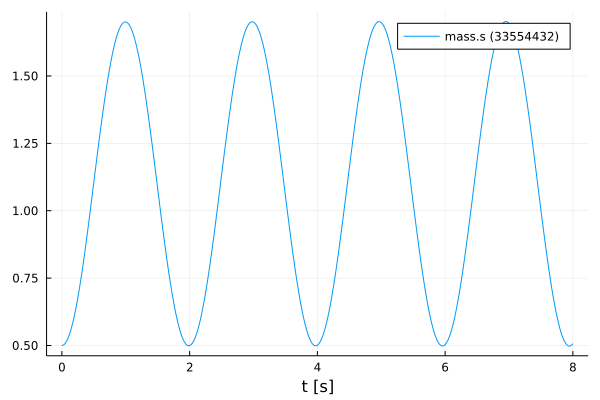

In [5]:
param1 = Dict("spring.c"=>10.0, "mass_s0"=>1.0)
data1 = fmiSimulate(comp1, tStart, tStop; parameters=param1, recordValues=vrs, instantiate=false, freeInstance=false)
fig = fmiPlot(data1)

For control, you can compare again the address of the instance to the previous address, and it should be the same address. As soon as this is not the case an error would be thrown by the macro `@assert`.

In [6]:
@assert comp1.compAddr === comp1Address

### Second Instance

To create a second instance of the FMU it is necessary to call the command `fmiInstantiate!()`. With the component address you now have a unique instance of the FMU.

In [7]:
comp2 = fmiInstantiate!(myFMU; loggingOn=true)
comp2Address= comp2.compAddr
println(comp2)

FMU:            SpringPendulum1D
InstanceName:   SpringPendulum1D
Address:        Ptr{Nothing} @0x0000000004a50840
State:          fmi2ComponentStateInstantiated
Logging:        false
FMU time:       -Inf
FMU states:     nothing


The addresses of the instantiated FMUs must differ, and you can see that in the comparison below.

In [8]:
@assert comp1Address !== comp2Address

Again, a dictionary for the parameters is created. With this dictionary you can set the initial states of the variables of the FMU. For the spring constant `spring.c` a value of $1.0 \frac{N}{m}$ and for the position of the mass `mass.s` a value of $2.0 m$ is set. The created dictionary with the specified variables for recording are passed to the command for simulation. As before, the two keywords `instantiate=false` and `freeInstance=false` are set.

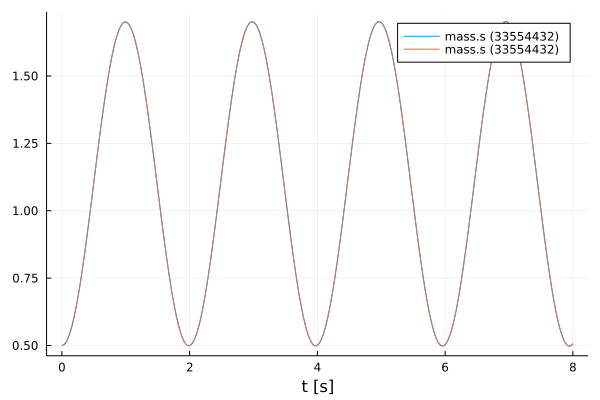

In [9]:
param2 = Dict("spring.c"=>1.0, "mass.s"=>2.0)
data2 = fmiSimulateCS(comp2, tStart, tStop;  parameters=param2, recordValues=vrs, instantiate=false, freeInstance=false)
fmiPlot!(fig, data2)

For control, you can compare again the address of the instance `comp2` to the previous address `comp2Address` and it should be the same address.

In [10]:
@assert comp2.compAddr === comp2Address

### Unload FMU

After plotting the data, the FMU is unloaded and all unpacked data on disc is removed.

In [11]:
fmiUnload(myFMU)

### Summary

Based on the example it can be seen that it is possible to create different instances of an FMU. The different instances can then be used to perform different simulations.